In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#tickers = ['^IXIC', '^DJI', '^GSPC', '^RUT', 'BTC-USD','^N225','^GDAXI', '^XAX']
tickers = ['^IXIC', '^DJI', '^GSPC', '^RUT', '^N225','^GDAXI', '^XAX']

# Define which online source one should use
data_source = 'yahoo'

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2017-12-1'
end_date = '2017-12-15'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, data_source, start_date, end_date)

In [4]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
adj_close = panel_data.ix['Adj Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex adj_close using all_weekdays as the new index
adj_close = adj_close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
adj_close = adj_close.fillna(method='ffill')

/Users/EthanL/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


In [6]:
adj_close

,^DJI,^GDAXI,^GSPC,^IXIC,^N225,^RUT,^XAX
2017-12-01,24231.589844,12861.490234,2642.219971,6847.589844,22819.029297,1537.020020,2614.100098
2017-12-04,24290.050781,13058.549805,2639.439941,6775.370117,22707.160156,1532.410034,2608.870117
2017-12-05,24180.640625,13048.540039,2629.570068,6762.209961,22622.380859,1516.760010,2590.080078
2017-12-06,24140.910156,12998.849609,2629.270020,6776.379883,22177.039063,1508.880005,2562.919922
2017-12-07,24211.480469,13045.150391,2636.979980,6812.839844,22498.029297,1520.469971,2563.050049
2017-12-08,24329.160156,13153.700195,2651.500000,6840.080078,22811.080078,1521.719971,2566.820068
2017-12-11,24386.029297,13123.650391,2659.989990,6875.080078,22938.730469,1519.839966,2568.790039
2017-12-12,24504.800781,13183.530273,2664.110107,6862.319824,22866.169922,1516.119995,2562.399902
2017-12-13,24585.429688,13125.639648,2662.850098,6875.799805,22758.070313,1524.449951,2560.699951
2017-12-14,24508.660156,13068.080078,2652.010010,6856.529785,22694.449219,1506.949951,2559.790039


In [25]:
#Calculate one day returns

count = 0
daily_DJI = []
daily_GSPC = []
daily_IXIC = []
daily_RUT = []
daily_BTC = []

for index, row in adj_close.iterrows():
   
        if count == 0:
            Dailydji = 0
            Dailygspc = 0
            Dailyixic = 0
            Dailyrut = 0
            Dailybtc = 0
            count = count + 1
            daily_DJI.append(Dailydji)
            daily_GSPC.append(Dailygspc)
            daily_IXIC.append(Dailyixic)
            daily_RUT.append(Dailyrut)
            #daily_BTC.append(Dailybtc)
            #print (count)
        else:
        
            Dailydji = adj_close["^DJI"][count]/adj_close["^DJI"][count - 1] - 1
            Dailygspc = adj_close["^GSPC"][count]/adj_close["^GSPC"][count - 1] - 1
            Dailyixic = adj_close["^IXIC"][count]/adj_close["^IXIC"][count - 1] - 1
            Dailyrut = adj_close["^RUT"][count]/adj_close["^RUT"][count - 1] - 1
            #Dailybtc = adj_close["BTC-USD"][count]/adj_close["BTC-USD"][count-1] -1
            count = count + 1
            daily_DJI.append(Dailydji)
            daily_GSPC.append(Dailygspc)
            daily_IXIC.append(Dailyixic)
            daily_RUT.append(Dailyrut)
            daily_BTC.append(Dailybtc)
            #adj_close.loc[index,'Daily'] = adj_close["^DJI"][count]/adj_close["^DJI"][count - 1] - 1
            #print (count)
            
        #print("index is" + str(index))
        #print("row is" + str(row))

daily_DJI = pd.DataFrame({"Daily DJI":daily_DJI})
daily_GSPC = pd.DataFrame({"Daily GSPC":daily_GSPC})
daily_IXIC = pd.DataFrame({"Daily IXIC":daily_IXIC})
daily_RUT = pd.DataFrame({"Daily RUT":daily_RUT})
#daily_BTC = pd.DataFrame({"Daily BTC":daily_BTC})
daily_DJI
daily_stocks = pd.DataFrame.from_records({"Daily DJI":[daily_DJI], "Daily GSPC":[daily_GSPC],"Daily IXIC":[daily_IXIC],"Daily RUT":[daily_RUT]})

In [26]:
daily_stocks.head()

,Daily DJI,Daily GSPC,Daily IXIC,Daily RUT
0,Daily DJI 0 0.000000 1 0.002413 2 ...,Daily GSPC 0 0.000000 1 -0.001052 2...,Daily IXIC 0 0.000000 1 -0.010547 2...,Daily RUT 0 0.000000 1 -0.002999 2 ...


In [21]:
daily_GSPC

,Daily GSPC
0,0.000000
1,-0.001052
2,-0.003739
3,-0.000114
4,0.002932
5,0.005506
6,0.003202
7,0.001549
8,-0.000473
9,-0.004071


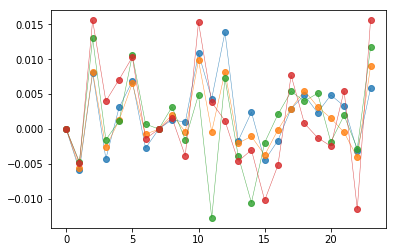

In [8]:
import numpy as np

plt.plot(np.arange(len(daily_DJI["Daily DJI"])),
         daily_DJI["Daily DJI"], marker="o", linewidth=0.5,
         alpha=0.8)

plt.plot(np.arange(len(daily_GSPC["Daily GSPC"])),
         daily_GSPC["Daily GSPC"], marker="o", linewidth=0.5,
         alpha=0.8)

plt.plot(np.arange(len(daily_IXIC["Daily IXIC"])),
         daily_IXIC["Daily IXIC"], marker="o", linewidth=0.5,
         alpha=0.8)

plt.plot(np.arange(len(daily_RUT["Daily RUT"])),
         daily_RUT["Daily RUT"], marker="o", linewidth=0.5,
         alpha=0.8)

#plt.plot(np.arange(len(daily_BTC["Daily BTC"])),
#         daily_BTC["Daily BTC"], marker="o", linewidth=0.5,
#         alpha=0.8)

plt.show()

In [ ]:
cramer = pd.read_csv("jimcramer2.csv")
#cramer

In [ ]:
cramer.groupby("Date").mean()

In [9]:
adj_close = adj_close.reset_index()
adj_close

,index,^DJI,^GDAXI,^GSPC,^IXIC,^N225,^RUT,^XAX
0,2017-11-14,23409.470703,13033.480469,2578.870117,6737.870117,22380.009766,1471.260010,2586.260010
1,2017-11-15,23271.279297,12976.370117,2564.620117,6706.209961,22028.320313,1464.089966,2579.510010
2,2017-11-16,23458.359375,13047.219727,2585.639893,6793.290039,22351.119141,1486.880005,2593.939941
3,2017-11-17,23358.240234,12993.730469,2578.850098,6782.790039,22396.800781,1492.819946,2601.479980
4,2017-11-20,23430.330078,13058.660156,2582.139893,6790.709961,22261.759766,1503.400024,2577.320068
5,2017-11-21,23590.830078,13167.540039,2599.030029,6862.479980,22416.480469,1518.890015,2587.949951
6,2017-11-22,23526.179688,13015.040039,2597.080078,6867.359863,22523.150391,1516.760010,2600.139893
7,2017-11-23,23526.179688,13008.549805,2597.080078,6867.359863,22523.150391,1516.760010,2600.139893
8,2017-11-24,23557.990234,13059.839844,2602.419922,6889.160156,22550.849609,1519.160034,2604.129883
9,2017-11-27,23580.779297,13000.200195,2601.419922,6878.520020,22495.990234,1513.310059,2585.100098


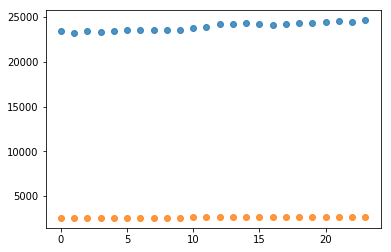

In [10]:
import numpy as np
plt.plot(np.arange(len(adj_close["^DJI"])),
         adj_close["^DJI"], marker="o", linewidth=0.5, linestyle = 'None',
         alpha=0.8)

plt.plot(np.arange(len(adj_close["^GSPC"])),
         adj_close["^GSPC"], marker="o", linewidth=0.5, linestyle = 'None',
         alpha=0.8)

plt.show()

In [11]:
print(len(adj_close["^DJI"]))

24


In [ ]:
# Get the MSFT time series. This now returns a Pandas Series object indexed by date.
dji = adj_close.ix[:, '^DJI']
gspc = adj_close.ix[:, '^GSPC']
ixic = adj_close.ix[:, '^IXIC']
rut = adj_close.ix[:, '^RUT']
# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_dji = dji.rolling(window=20).mean()
long_rolling_dji = dji.rolling(window=100).mean()

short_rolling_gspc = gspc.rolling(window=20).mean()
long_rolling_gspc = gspc.rolling(window=100).mean()

short_rolling_ixic = ixic.rolling(window=20).mean()
long_rolling_ixic = ixic.rolling(window=100).mean()

short_rolling_rut = rut.rolling(window=20).mean()
long_rolling_rut = rut.rolling(window=100).mean()


# Plot everything by leveraging the very powerful matplotlib package
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
#ax.plot(dji.index, dji, label='DOW JONES')
ax.plot(ixic.index, ixic, label='IXIC')
ax.plot(gspc.index, gspc, label='GSPC')
ax.plot(rut.index, rut, label='RUT')
#ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
#ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
plt.show()